In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import atan

In [67]:
curves=((500,200,15,5),
        (620,300,20,2),
        (770,350,15,5),
        (790,400,10,3))

def sample(x):
    steady_state,start_value,start_rate,noise = random.choice(curves)
    start_delta = steady_state - start_value
    return start_value + start_delta * atan((x/start_rate)**2.) + np.random.normal(scale=noise)

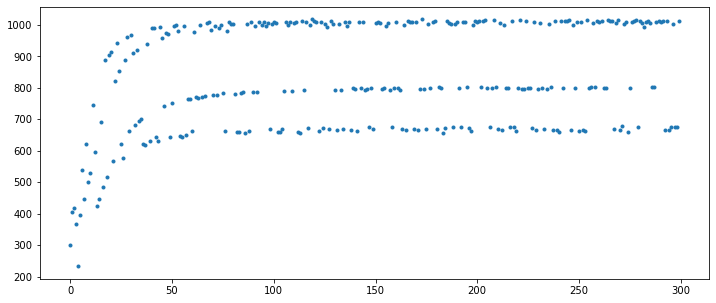

In [125]:
nsamp = 300
x=np.arange(nsamp)
y=[sample(i) for i in range(nsamp)]

plt.figure(figsize=(12,5))
plt.plot(x,y,'.')
plt.show()

0.5762613298637979

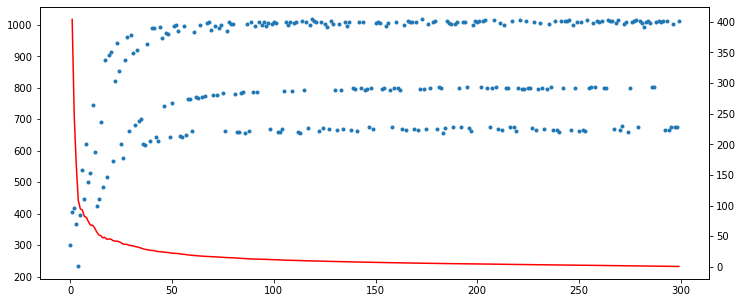

In [135]:
# Slope Test

Sx = np.cumsum(x)[1:]
Sy = np.cumsum(y)[1:]
Sxx = np.cumsum(x*x)[1:]
Sxy = np.cumsum(x*y)[1:]
m = (nsamp*Sxy-Sx*Sy)/(nsamp*Sxx-Sx*Sx)

fig = plt.figure(figsize=(12,5))
gs = fig.add_gridspec(1,1)
axs = gs.subplots()
axs.plot(x,y,'.')
axs = axs.twinx()
axs.plot(x[1:],m,'r')


m[-1]

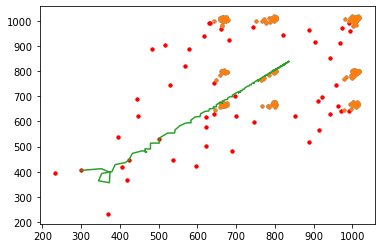

In [162]:
# Predictive Correlation

qx = y[:-1]
qy = y[1:]
plt.plot(qx[:50],qy[:50],'r.')
plt.plot(qx[50:],qy[50:],'.')

qxo = np.cumsum(qx)/np.arange(1,1+len(qx))
qyo = np.cumsum(qy)/np.arange(1,1+len(qy))

plt.plot(qx[:50],qy[:50],'r.')
plt.plot(qx[50:],qy[50:],'.')
plt.plot(qxo,qyo)

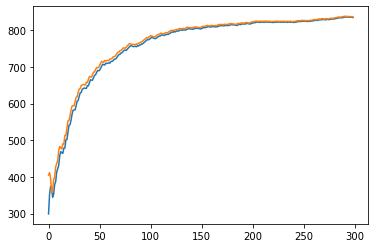

In [164]:
plt.plot(np.arange(len(qxo)),qxo)
plt.plot(np.arange(len(qyo)),qyo)
plt.show()